In [1349]:
import pandas as pd 
import numpy as no 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score

%matplotlib inline

In [1350]:
train = pd.read_csv("datasets/train.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [1351]:
train.columns=map(str.lower, train.columns)
train.columns = train.columns.str.strip().str.replace(" ","_")

In [1352]:
train.drop(index = [1712], inplace = True)

In [1353]:
train[['garage_qual', 'garage_cond']] = train[['garage_qual', 'garage_cond']].fillna(value = 0)

In [1354]:
train['mas_vnr_area'] = train[["mas_vnr_area"]].fillna(value = 0)

In [1355]:

train["garage_comb"] = train["garage_area"] * train["garage_cars"]

In [1356]:
train.loc[train['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000,280.0


In [1357]:
train.drop(index=[1327], inplace = True)

In [1358]:
train.drop(index=[1035], inplace = True)
train.drop(index=[1897], inplace = True)
train.drop(index=[823,1158], inplace = True)
train.drop(index = [960,1885], inplace = True)
train.drop(index = [616, 858,1939], inplace = True)
train.drop(index = [925], inplace = True)
train.drop(index = [1428], inplace = True)
train.drop(index = [1791], inplace = True)

In [1359]:
street_cleaned = { "Grvl" : 0,
                   "Pave" : 1}
train["street"] = train[["street"]].replace(street_cleaned)

ms_ven_type_cld = {
                   "None" : 0, 
                   "BrkCmn": 1, 
                   "BrkFace": 2, 
                   "Stone": 3 }
train["mas_vnr_type"] = train[["mas_vnr_type"]].replace(ms_ven_type_cld)

na_to_ex_rating = {
                 "Po" : 1, 
                 "Fa" : 2,
                 "TA" : 3, 
                 "Gd" : 4, 
                 "Ex" : 5,}
train['bsmt_qual'] = train[['bsmt_qual']].replace(na_to_ex_rating)

train["bsmt_cond"] = train[['bsmt_cond']].replace(na_to_ex_rating)

land_contour_cleaned = { "Bnk" : 0, 
                          "Lvl" : 1, 
                          "Low" : 2, 
                          "HLS" : 3} 
train['land_contour'] = train[['land_contour']].replace(land_contour_cleaned)

heating_qc_cleaned = {
                 "Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
train['heating_qc'] = train[['heating_qc']].replace(heating_qc_cleaned)

kitchen_qc_cleaned = {"Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
train['kitchen_qual'] = train[['kitchen_qual']].replace(kitchen_qc_cleaned)

train['exter_qual'] = train[['exter_qual']].replace(kitchen_qc_cleaned)
train['exter_cond'] = train[['exter_cond']].replace(kitchen_qc_cleaned)




In [1360]:
train = pd.get_dummies(train, columns = ['neighborhood'], drop_first=True)
train = pd.get_dummies(train, columns = ['central_air'], drop_first=True)
train = pd.get_dummies(train, columns = ['electrical'], drop_first = True)
train = pd.get_dummies(train, columns = ['heating'], drop_first = True)
train = pd.get_dummies(train, columns = ['functional'], drop_first = True)
train = pd.get_dummies(train, columns = ['exterior_1st'], drop_first = True)

In [1361]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,garage_comb,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,heating_GasW,heating_Grav,heating_OthW,heating_Wall,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,109,533352170,60,RL,NaN,13517,1,NaN,IR1,1,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,Plywood,2.0,289.0,3,2,CBlock,3.0,3.0,No,GLQ,533.0,Unf,0.0,192.0,725.0,4,725,754,0,1479,0.0,0.0,2,1,3,1,3,6,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,950.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,1,NaN,IR1,1,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,2.0,132.0,3,2,PConc,4.0,3.0,No,GLQ,637.0,Unf,0.0,276.0,913.0,4,913,1209,0,2122,1.0,0.0,2,1,4,1,3,8,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,1118.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,153,535304180,20,RL,68.0,7922,1,NaN,Reg,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,0.0,0.0,2,3,CBlock,3.0,3.0,No,GLQ,731.0,Unf,0.0,326.0,1057.0,2,1057,0,0,1057,1.0,0.0,1,0,3,1,3,5,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,246.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,318,916386060,60,RL,73.0,9802,1,NaN,Reg,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,0.0,0.0,2,2,PConc,4.0,3.0,No,Unf,0.0,Unf,0.0,384.0,384.0,3,744,700,0,1444,0.0,0.0,2,1,3,1,2,7,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.0,14235,1,NaN,IR1,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Plywood,0.0,0.0,2,2,PConc,2.0,4.0,No,Unf,0.0,Unf,0.0,676.0,676.0,2,831,614,0,1445,0.0,0.0,2,0,3,1,2,6,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,968.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1362]:
train.isnull().sum()

id                         0
pid                        0
ms_subclass                0
ms_zoning                  0
lot_frontage             329
lot_area                   0
street                     0
alley                   1898
lot_shape                  0
land_contour               0
utilities                  0
lot_config                 0
land_slope                 0
condition_1                0
condition_2                0
bldg_type                  0
house_style                0
overall_qual               0
overall_cond               0
year_built                 0
year_remod/add             0
roof_style                 0
roof_matl                  0
exterior_2nd               0
mas_vnr_type              22
mas_vnr_area               0
exter_qual                 0
exter_cond                 0
foundation                 0
bsmt_qual                 52
bsmt_cond                 52
bsmt_exposure             55
bsmtfin_type_1            52
bsmtfin_sf_1               0
bsmtfin_type_2

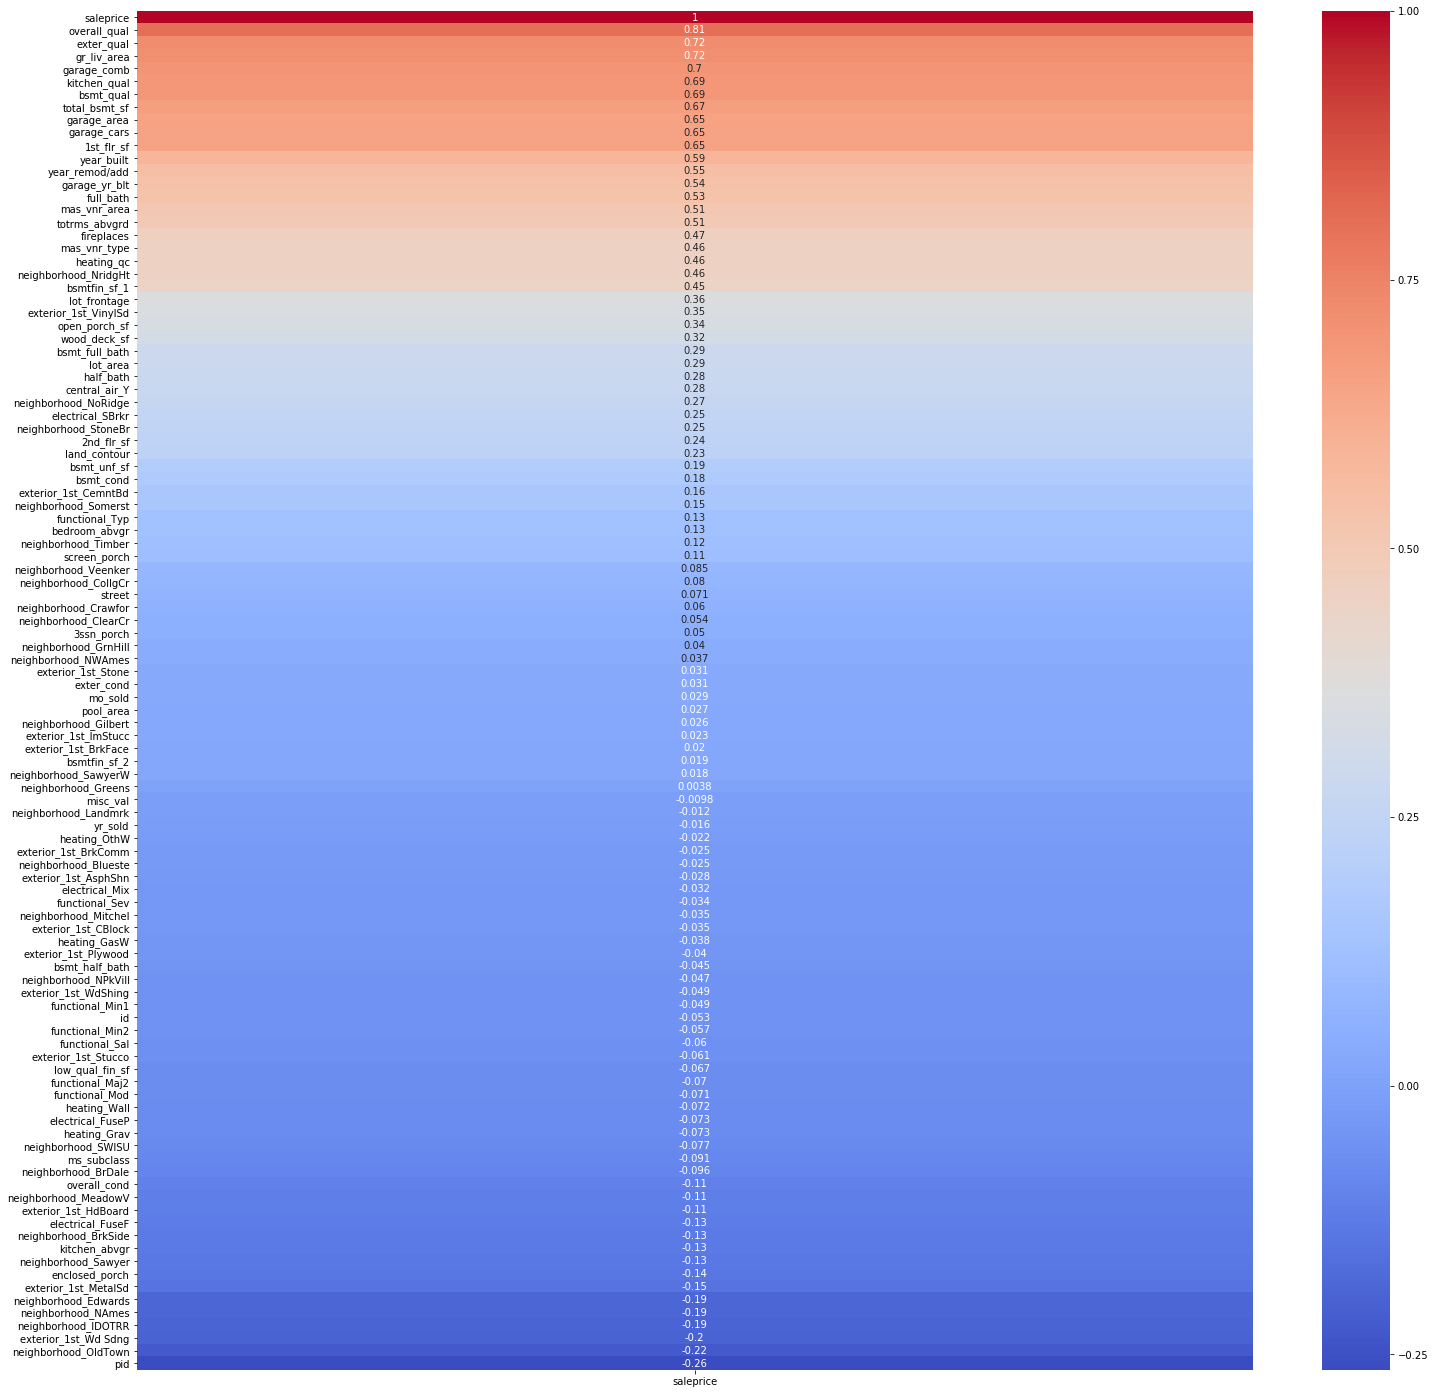

In [1363]:
plt.figure(figsize = (25,25))
sns.heatmap(train.corr()[['saleprice']].sort_values(by = "saleprice" ,ascending = False), annot = True, cmap = 'coolwarm');

In [1364]:
train.isnull().sum()

id                         0
pid                        0
ms_subclass                0
ms_zoning                  0
lot_frontage             329
lot_area                   0
street                     0
alley                   1898
lot_shape                  0
land_contour               0
utilities                  0
lot_config                 0
land_slope                 0
condition_1                0
condition_2                0
bldg_type                  0
house_style                0
overall_qual               0
overall_cond               0
year_built                 0
year_remod/add             0
roof_style                 0
roof_matl                  0
exterior_2nd               0
mas_vnr_type              22
mas_vnr_area               0
exter_qual                 0
exter_cond                 0
foundation                 0
bsmt_qual                 52
bsmt_cond                 52
bsmt_exposure             55
bsmtfin_type_1            52
bsmtfin_sf_1               0
bsmtfin_type_2

In [1365]:
train['bsmt_qual'] = train[["bsmt_qual"]].fillna(value = 0)
train['bsmt_cond'] = train[["bsmt_cond"]].fillna(value = 0)


In [1366]:
train["deck_*_porch"] = train["wood_deck_sf"] * train["open_porch_sf"]
train["exter_cond*exter_qual"] = train["exter_cond"] * train["exter_qual"]
train["total_bsmt_sf*gr_liv_area"] = train["total_bsmt_sf"] * train["gr_liv_area"]
train["bsmt_qual*bsmt_cond"] = train["bsmt_qual"] * train["bsmt_cond"]
train["garage_comb"] = train["garage_area"] * train["garage_cars"]

In [1367]:
features = [ 'overall_qual', 'exter_qual',
       'gr_liv_area', 'garage_comb', 'kitchen_qual', 'total_bsmt_sf',
       'garage_area', 'garage_cars', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker', 'central_air_Y', 'electrical_FuseF',
       'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr',
       'heating_GasW', 'heating_Grav', 'heating_OthW', 'heating_Wall',
       'functional_Maj2', 'functional_Min1', 'functional_Min2',
       'functional_Mod', 'functional_Sal', 'functional_Sev', 'functional_Typ',
       'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'exterior_1st_BrkFace',
       'exterior_1st_CBlock', 'exterior_1st_CemntBd', 'exterior_1st_HdBoard',
       'exterior_1st_ImStucc', 'exterior_1st_MetalSd', 'exterior_1st_Plywood',
       'exterior_1st_Stone', 'exterior_1st_Stucco', 'exterior_1st_VinylSd',
       'exterior_1st_Wd Sdng', 'exterior_1st_WdShing', 'deck_*_porch',
       'exter_cond*exter_qual', "bsmt_qual*bsmt_cond",
       'total_bsmt_sf*gr_liv_area', 'garage_comb']

In [1368]:
train.isnull().sum()

id                              0
pid                             0
ms_subclass                     0
ms_zoning                       0
lot_frontage                  329
lot_area                        0
street                          0
alley                        1898
lot_shape                       0
land_contour                    0
utilities                       0
lot_config                      0
land_slope                      0
condition_1                     0
condition_2                     0
bldg_type                       0
house_style                     0
overall_qual                    0
overall_cond                    0
year_built                      0
year_remod/add                  0
roof_style                      0
roof_matl                       0
exterior_2nd                    0
mas_vnr_type                   22
mas_vnr_area                    0
exter_qual                      0
exter_cond                      0
foundation                      0
bsmt_qual     

In [1369]:
train.corr()[['saleprice']].sort_values(by = "saleprice" ,ascending = False).index

Index(['saleprice', 'total_bsmt_sf*gr_liv_area', 'overall_qual', 'exter_qual',
       'gr_liv_area', 'garage_comb', 'kitchen_qual', 'total_bsmt_sf',
       'garage_area', 'garage_cars',
       ...
       'kitchen_abvgr', 'neighborhood_Sawyer', 'enclosed_porch',
       'exterior_1st_MetalSd', 'neighborhood_Edwards', 'neighborhood_NAmes',
       'neighborhood_IDOTRR', 'exterior_1st_Wd Sdng', 'neighborhood_OldTown',
       'pid'],
      dtype='object', length=110)

In [1370]:
X = train[features]
y = train['saleprice']

In [1371]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [1372]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed= pt.transform(X_test)

/Users/nathan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [1373]:
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_transformed = pt_y.transform(y_train.to_frame())
y_test_transformed = pt_y.transform(y_test.to_frame())

In [1374]:
y_test.shape

(510,)

In [1375]:
lr = LinearRegression()

In [1376]:
lr_scores = cross_val_score(lr, X_train, y_train_transformed, cv=5)
lr_scores.mean()

0.8736844195562394

In [1377]:
lr.fit(X_train, y_train_transformed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1378]:
lr.score(X_train, y_train_transformed)

0.8885301222491196

In [1379]:
lr.score(X_test, y_test_transformed)

0.8631290095452671

In [1380]:
cross_val_score(lr, X_train, y_train_transformed, cv = 10).mean()

0.874726002174976

In [1381]:
val_preds = pd.DataFrame(lr.predict(X_test), columns = ["val_preds"])
val_preds.head()

,val_preds
0,0.892475
1,-0.512676
2,2.027769
3,-0.948974
4,-0.183060


In [1382]:
val_preds.size

510

In [1383]:
y_test_transformed.size

510

In [1384]:
val_preds['y_val'] = y_test_transformed
val_preds['val_errors'] = val_preds['y_val']-val_preds['val_preds']

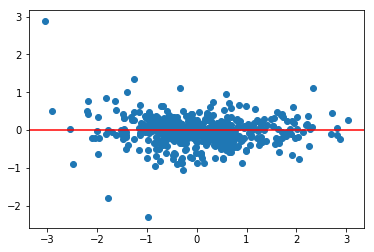

In [1385]:
plt.scatter(x = val_preds['val_preds'], y = val_preds['val_errors'])
plt.axhline(0, color='red')

In [1386]:
test= pd.read_csv('datasets/test.csv')

In [1387]:
test.columns=map(str.lower, test.columns)
test.columns = test.columns.str.strip().str.replace(" ","_")


In [1388]:
for col in test.columns:
#     if col is object
    if test[col].dtypes == object:
        test[col].fillna('NA', inplace=True)
#     elif col is float or int
    if test[col].dtypes == int or test[col].dtypes == float:
        test[col].fillna(0, inplace=True)

#test.isnull().sum().sort_values(ascending=False)

In [1389]:
# test['bsmt_qual'].fillna('NA')
# test['bsmt_cond'].fillna("NA")

In [1390]:
street_cleaned = { "Grvl" : 0,
                   "Pave" : 1}
test["street"] = test[["street"]].replace(street_cleaned)

ms_ven_type_cld = {
                   "None" : 0, 
                   "BrkCmn": 1, 
                   "BrkFace": 2, 
                   "Stone": 3 }
test["mas_vnr_type"] = test[["mas_vnr_type"]].replace(ms_ven_type_cld)

na_to_ex_rating = {"NA": 0,
                 "Po" : 1, 
                 "Fa" : 2,
                 "TA" : 3, 
                 "Gd" : 4, 
                 "Ex" : 5,}
test['bsmt_qual'] = test[['bsmt_qual']].replace(na_to_ex_rating)

test["bsmt_cond"] = test[['bsmt_cond']].replace(na_to_ex_rating)

land_contour_cleaned = { "Bnk" : 0, 
                          "Lvl" : 1, 
                          "Low" : 2, 
                          "HLS" : 3} 
test['land_contour'] = test[['land_contour']].replace(land_contour_cleaned)

heating_qc_cleaned = {
                 "Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
test['heating_qc'] = test[['heating_qc']].replace(heating_qc_cleaned)

kitchen_qc_cleaned = {"Po" : 0, 
                 "Fa" : 1,
                 "TA" : 2, 
                 "Gd" : 3, 
                 "Ex" : 4,}
test['kitchen_qual'] = test[['kitchen_qual']].replace(kitchen_qc_cleaned)

test['exter_qual'] = test[['exter_qual']].replace(kitchen_qc_cleaned)
test['exter_cond'] = test[['exter_cond']].replace(kitchen_qc_cleaned)
# test['bsmt_qual'].fillna(0)
# test['bsmt_cond'].fillna(0)



In [1391]:
test.isnull().sum().sort_values(ascending=False).head(10)

sale_type         0
yr_sold           0
year_remod/add    0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
dtype: int64

## Beginning Test Transformation 


In [1393]:
test[['bsmt_qual', 'bsmt_cond']].isnull().sum()

bsmt_qual    0
bsmt_cond    0
dtype: int64

In [1394]:
for i, val in test[['bsmt_cond']].iterrows():
    try:
        int(val)
    except:
        print(i)

In [1395]:
# test['bsmt_qual'] = pd.to_numeric(train['bsmt_qual'])
test['bsmt_cond'] = test['bsmt_cond'].astype(int)

In [1396]:
test["deck_*_porch"] = test["wood_deck_sf"] * test["open_porch_sf"]
test["exter_cond*exter_qual"] = test["exter_cond"] * test["exter_qual"]
test["total_bsmt_sf*gr_liv_area"] = test["total_bsmt_sf"] * test["gr_liv_area"]
test["bsmt_qual*bsmt_cond"] = test["bsmt_qual"] * test["bsmt_cond"]
test["bsmt_qual*bsmt_cond"] = test["bsmt_qual"] * test["bsmt_cond"]
test["garage_comb"] = test["garage_area"] * test["garage_cars"]

In [1397]:
test.isnull().sum().sort_values(ascending=False).head(10)

garage_comb     0
foundation      0
roof_style      0
roof_matl       0
exterior_1st    0
exterior_2nd    0
mas_vnr_type    0
mas_vnr_area    0
exter_qual      0
exter_cond      0
dtype: int64

In [1398]:
test['bsmt_qual*bsmt_cond'].fillna(0)

0       6
1      12
2      16
3       9
4      12
       ..
874     9
875     9
876     9
877     9
878     9
Name: bsmt_qual*bsmt_cond, Length: 879, dtype: int64

In [1399]:
test = pd.get_dummies(test, columns = ['neighborhood'], drop_first=True)
test = pd.get_dummies(test, columns = ['central_air'], drop_first=True)
test = pd.get_dummies(test, columns = ['electrical'], drop_first = True)
test = pd.get_dummies(test, columns = ['heating'], drop_first = True)
test = pd.get_dummies(test, columns = ['functional'], drop_first = True)
test = pd.get_dummies(test, columns = ['exterior_1st'], drop_first = True)

In [1400]:
test

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,deck_*_porch,exter_cond*exter_qual,total_bsmt_sf*gr_liv_area,bsmt_qual*bsmt_cond,garage_comb,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_NA,electrical_SBrkr,heating_GasA,heating_GasW,heating_Grav,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing
0,2658,902301120,190,RM,69.0,9142,1,Grvl,Reg,1,AllPub,Inside,Gtl,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,0,0.0,2,1,Stone,2,3,No,Unf,0,Unf,0,1020,1020,3,908,1020,0,1928,0,0,2,0,4,2,1,9,0,NA,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0,2,1966560,6,440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,RL,0.0,9662,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,0,0.0,2,2,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,2,1967,0,0,1967,0,0,2,0,6,2,2,10,0,NA,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0,4,3869089,12,1160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.0,17104,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,0,0.0,3,2,PConc,4,4,Av,GLQ,554,Unf,0,100,654,4,664,832,0,1496,1,0,2,1,3,1,3,7,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,2400,6,978384,16,852,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,1,NA,Reg,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,0,0.0,3,2,CBlock,3,3,No,Unf,0,Unf,0,968,968,2,968,0,0,968,0,0,1,0,2,1,2,5,0,NA,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,0,6,937024,9,960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,625,535105100,20,RL,0.0,9500,1,NA,IR1,1,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,2,247.0,2,2,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,3,1394,0,0,1394,1,0,1,1,3,1,2,6,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,0,4,1943236,12,1028,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [1401]:
test['neighborhood_GrnHill'] = 0 
test['electrical_Mix'] = 0 
test['neighborhood_Landmrk'] = 0 
test['exterior_1st_Stone'] = 0 
test['functional_Sev'] = 0 
test['heating_Wall'] = 0 
test['exterior_1st_ImStucc'] = 0 
test['functional_Sal'] =0 
test['exterior_1st_CBlock'] = 0 
test['heating_OthW'] = 0 

In [1402]:
train[features].shape

(2037, 59)

In [1324]:
#test_preds = pd.DataFrame(lr.predict(test[features]))

In [1403]:
transformed_features = pt.transform(test[features])

In [1404]:
test_preds = lr.predict(transformed_features)

In [1405]:
test_preds.shape

(879, 1)

In [1406]:
test[features].shape

(879, 59)

In [1342]:
y_test_transformed.shape

(510, 1)

In [1338]:
test[features].head()

,overall_qual,exter_qual,gr_liv_area,garage_comb,kitchen_qual,total_bsmt_sf,garage_area,garage_cars,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,heating_GasW,heating_Grav,heating_OthW,heating_Wall,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,deck_*_porch,exter_cond*exter_qual,bsmt_qual*bsmt_cond,total_bsmt_sf*gr_liv_area,garage_comb
0,6,2,1928,440,1,1020,440,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,1966560,440
1,5,2,1967,1160,2,1967,580,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12,3869089,1160
2,7,3,1496,852,3,654,426,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2400,6,16,978384,852
3,5,3,968,960,2,968,480,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6,9,937024,960
4,6,2,1394,1028,2,1394,514,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,12,1943236,1028


In [1407]:


pred_reversed = pt_y.inverse_transform(test_preds.reshape(-1,1))


In [1408]:
(y_test, pred_reversed)

(753     213500
 111     139900
 519     345000
 535     112500
 967     181500
          ...  
 413     139500
 1814     81000
 1338    193000
 1660    143195
 310     300000
 Name: saleprice, Length: 510, dtype: int64, array([[ 1.90562462e+03],
        [ 2.73744277e+04],
        [ 2.44991871e+04],
        [ 1.06796448e+04],
        [ 2.68216655e+04],
        [ 2.31840138e+03],
        [ 9.37641858e+03],
        [ 2.16826253e+04],
        [ 2.58352957e+04],
        [ 3.19192432e+04],
        [ 2.49659937e+04],
        [ 1.91114167e+04],
        [ 1.96722260e+04],
        [ 1.81899453e+04],
        [-1.18151396e+01],
        [ 1.72139841e+04],
        [ 1.08944096e+04],
        [ 1.60784548e+04],
        [ 3.36707725e+04],
        [ 1.50455694e+04],
        [ 2.97712518e+04],
        [ 2.05919275e+04],
        [ 2.49802446e+04],
        [ 2.64363406e+04],
        [ 1.91110205e+04],
        [ 1.86681069e+04],
        [ 1.64374074e+04],
        [ 1.03095460e+04],
        [ 2.32535859e+04

In [1409]:
test['preds_1'] = test_preds
submission_7 = test.loc[:, ['id', 'preds_1']]
submission_7.head()

,id,preds_1
0,2658,-8.681526
1,2718,-4.061548
2,2414,-4.283363
3,1989,-5.856590
4,625,-4.102536


In [1410]:
submission_7.rename(columns = {'id': 'Id', 'preds_1': 'SalePrice'}, inplace=True)

In [1411]:
submission_7.to_csv('./Submissions/submissions_7', index=False )